# TASK: To Perform Exploratory Data Analysis On Iris Dataset

In [71]:
# Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
sns.set()

In [72]:
iris_data = pd.read_csv("E:\Jupyter Notebooks\EDA On Iris DataSet/Iris.csv")
print(iris_data.head())
print(iris_data.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(153, 6)


In [73]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             153 non-null    int64  
 1   SepalLengthCm  153 non-null    float64
 2   SepalWidthCm   153 non-null    float64
 3   PetalLengthCm  153 non-null    float64
 4   PetalWidthCm   153 non-null    float64
 5   Species        153 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ KB


Result:
1 All columns are not having any Null Entries (Non-null)

2 Four columns are numerical type (float64 bit)

3 Only Single column categorical type (Object)

In [74]:
iris_data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  153.000000     153.000000    153.000000     153.000000    153.000000
mean    75.411765       5.845752      3.064706       3.735948      1.192810
std     43.593748       0.825258      0.440614       1.771842      0.769407
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     37.000000       5.100000      2.800000       1.500000      0.300000
50%     75.000000       5.800000      3.000000       4.300000      1.300000
75%    113.000000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Result: Mean, Standard Deviation, Min and Max Values

In [76]:
iris_data.drop("Id", axis=1, inplace=True)
iris_data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [77]:
iris_data[iris_data.duplicated()]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             5.5           4.2            1.4           0.2     Iris-setosa
35             4.9           3.1            1.5           0.1     Iris-setosa
38             5.5           3.5            1.3           0.2     Iris-setosa
39             4.9           3.1            1.5           0.1     Iris-setosa
144            6.9           3.1            5.1           2.3  Iris-virginica
145            5.8           2.7            5.1           1.9  Iris-virginica

There are 3 duplicates, therefore we must check whether each species data set is balanced in no's or no

In [75]:
# Checking the balance
iris_data.Species.value_counts()

Iris-setosa        52
Iris-virginica     51
Iris-versicolor    50
Name: Species, dtype: int64

We Should drop the extra columns by using drop_duplicated method

In [78]:
iris_data.drop_duplicates(inplace=True)

In [79]:
iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

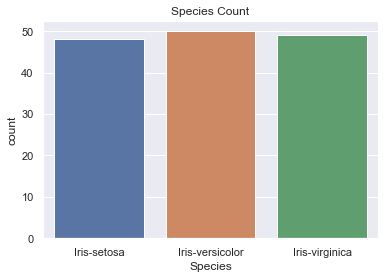

In [80]:
plt.title("Species Count")
sns.countplot(iris_data["Species"])

Inference: 
1. This further visualizes that species are well balanced
2. Each species ( Iris virginica, setosa, versicolor) has 50 as it’s count

In [81]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Uni-variate Analysis

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

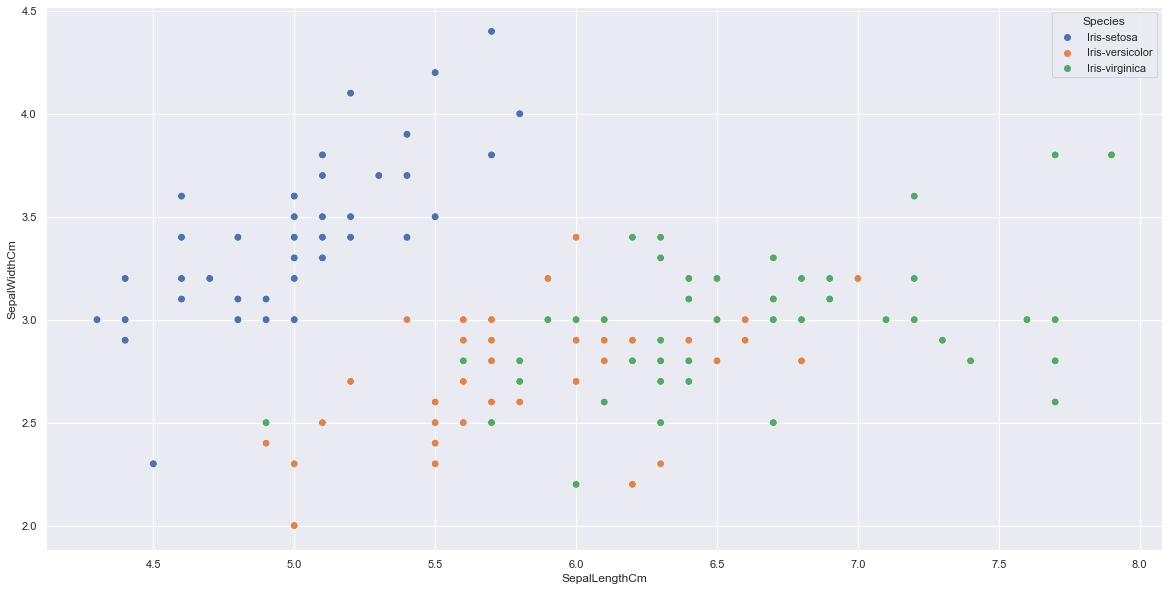

In [82]:
# Compare Sepal Length and Sepal Width
plt.figure(figsize=(20,10))
sns.scatterplot(iris_data["SepalLengthCm"], iris_data["SepalWidthCm"], hue=iris_data["Species"], s=60)

Inference:
1. Iris Setosa species has smaller sepal length but higher width.
2. Versicolor lies in almost middle for length as well as width
3. Virginica has larger sepal lengths and smaller sepal widths

<AxesSubplot:title={'center':'Comparison between various species based on petal lenght and width'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

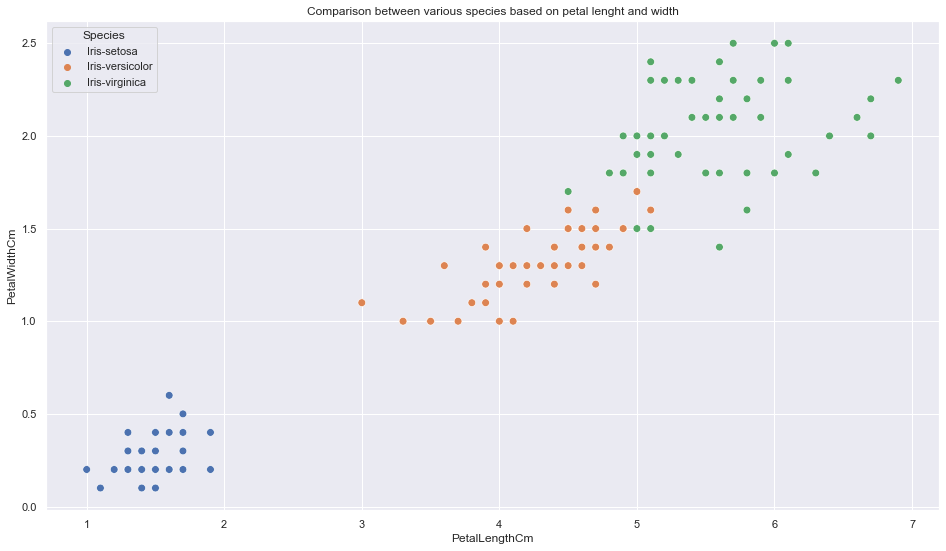

In [83]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(iris_data["PetalLengthCm"], iris_data["PetalWidthCm"], hue = iris_data["Species"], s= 60)

Inference: 
1. Setosa species have the smallest petal length as well as petal width
2. Versicolor species have average petal length and petal width
3. Virginica species have the highest petal length as well as petal width

## Bi-variate Analysis

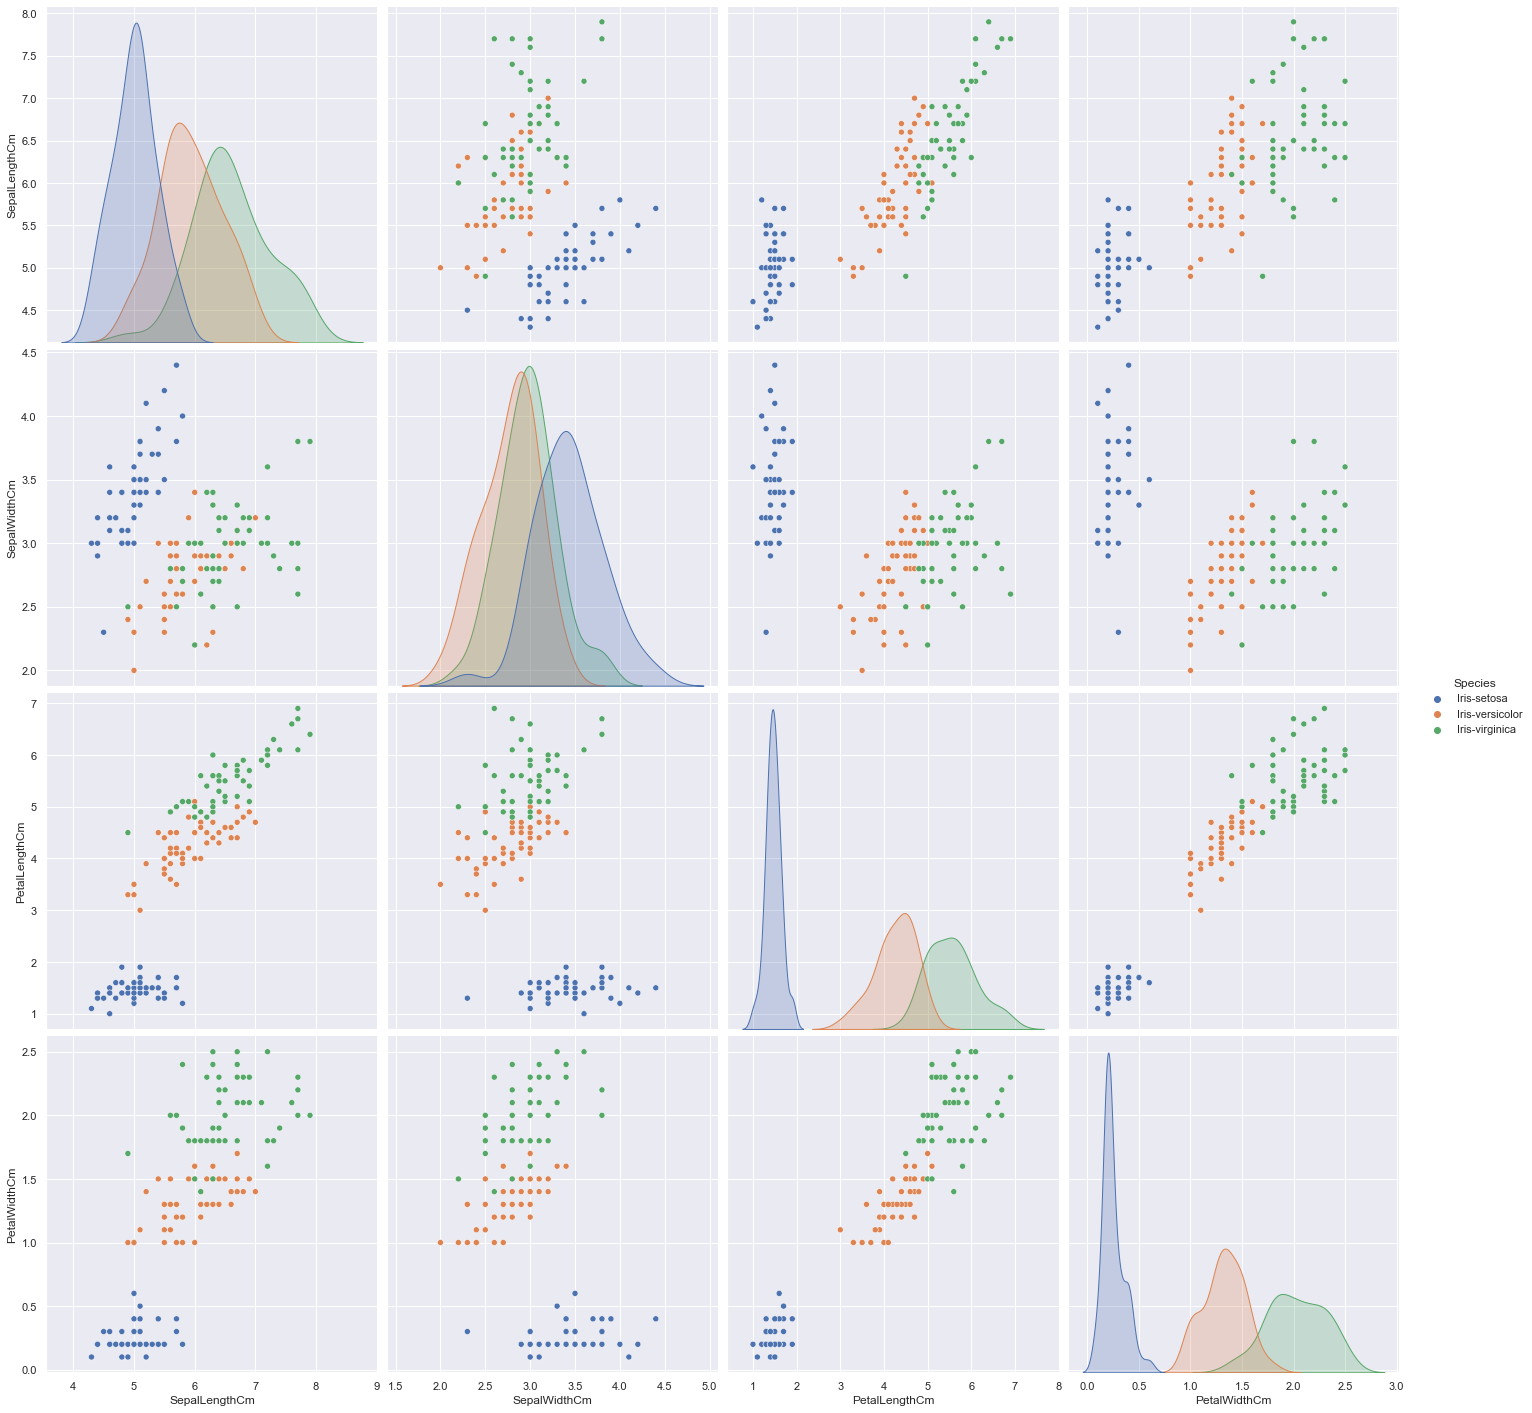

In [84]:
sns.pairplot(iris_data, hue="Species", height=5)

Inference:
1. High co relation between petal length and width columns.
2. Setosa has both low petal length and width
3. Versicolor has both average petal length and width
4. Virginica has both high petal length and width.
5. Sepal width for setosa is high and length is low.
6. Versicolor have average values for for sepal dimensions.
7. Virginica has small width but large sepal length

[]

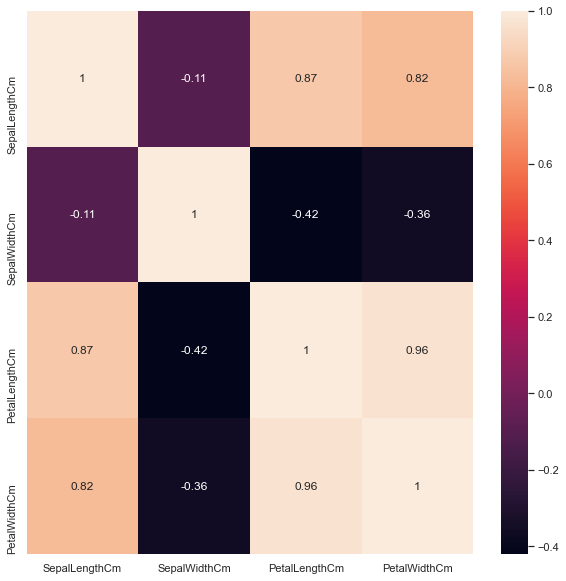

In [85]:
# Checking For Correlation
plt.figure(figsize=(10,10))
sns.heatmap(iris_data.corr(), annot=True)
plt.plot()

Inference:
1. Sepal Length and Sepal Width features are slightly correlated with each other

## Checking Mean & Median Values for each species


In [91]:
iris_data.groupby("Species").agg(["mean","median"])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa          5.010417    5.0     3.431250    3.4      1.462500   1.50   
Iris-versicolor      5.936000    5.9     2.770000    2.8      4.260000   4.35   
Iris-virginica       6.604082    6.5     2.979592    3.0      5.561224   5.60   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa         0.250000    0.2  
Iris-versicolor     1.326000    1.3  
Iris-virginica      2.028571    2.0

## Box plots to know about distribution

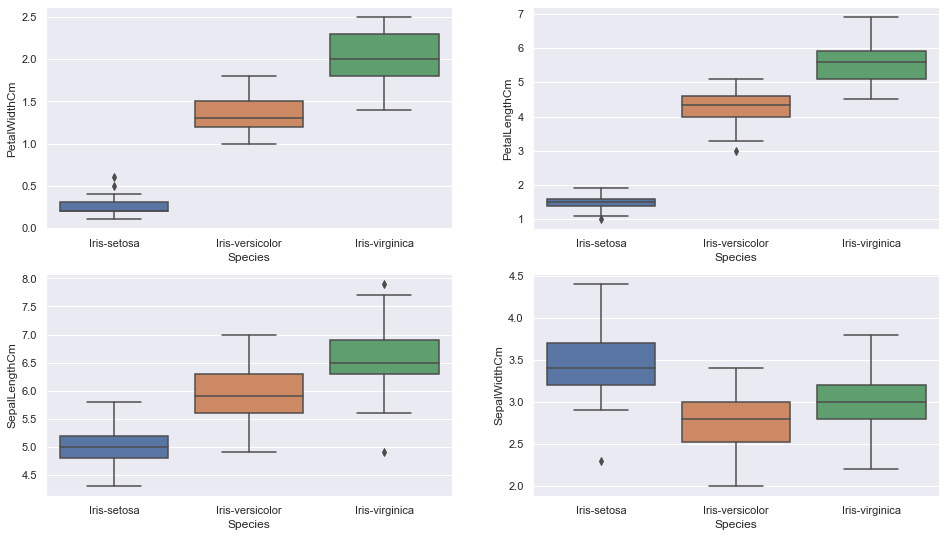

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x="Species", y="PetalWidthCm", data=iris_data, orient="v", ax=axes[0,0])
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_data, orient="v", ax=axes[0,1])
sns.boxplot(x="Species", y="SepalLengthCm", data=iris_data, orient="v", ax=axes[1,0])
sns.boxplot(x="Species", y="SepalWidthCm", data=iris_data, orient="v", ax=axes[1,1])
plt.show()

Inference
1. Setosa is having smaller feature and less distributed
2. Versicolor is distributed in a average manner and average features
3. Virginica is highly distributed with large no .of values and features
4. Clearly the mean/ median values are being shown by each plots for various features(sepal length & width, petal length & width)

## Violin Plot for checking distribution

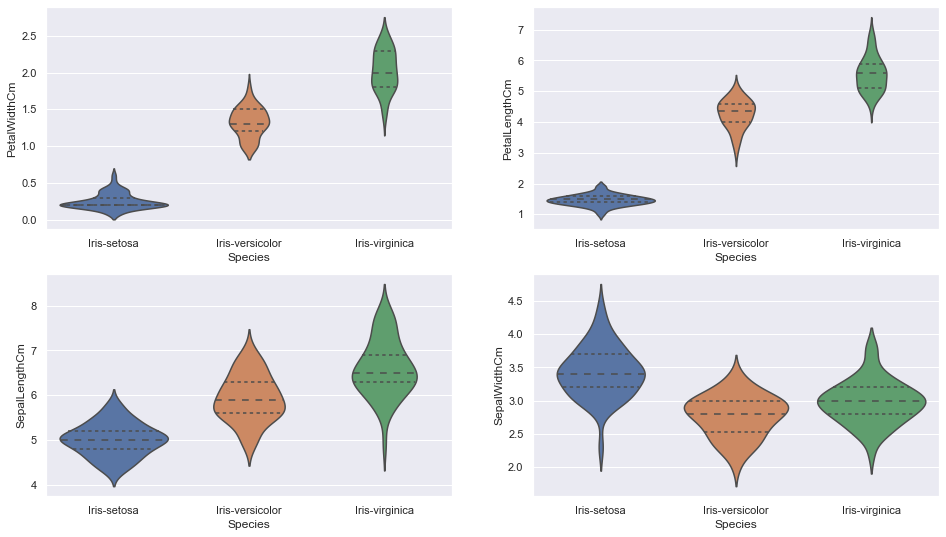

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(x="Species", y="PetalWidthCm", data=iris_data, orient="v", ax=axes[0,0], inner="quartile")
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_data, orient="v", ax=axes[0,1], inner="quartile")
sns.violinplot(x="Species", y="SepalLengthCm", data=iris_data, orient="v", ax=axes[1,0], inner="quartile")
sns.violinplot(x="Species", y="SepalWidthCm", data=iris_data, orient="v", ax=axes[1,1], inner="quartile")
plt.show()

Inference:
1. Setosa is having less distribution and density in case of petal length & width
2. Versicolor is distributed in a average manner and average features in case of petal length & width
3. Virginica is highly distributed with large no .of values and features in case of sepal length & width
4. High density values are depicting the mean/median values, for example: Iris Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0) as per the table

## Plotting the Histogram & Probability Density Function (PDF)

plotting the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.

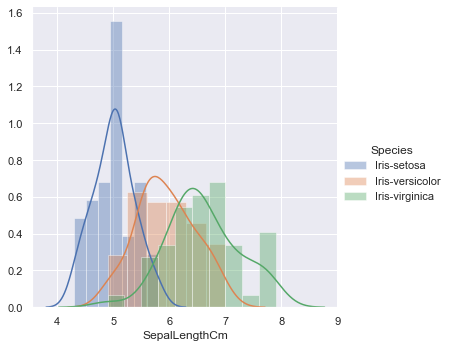

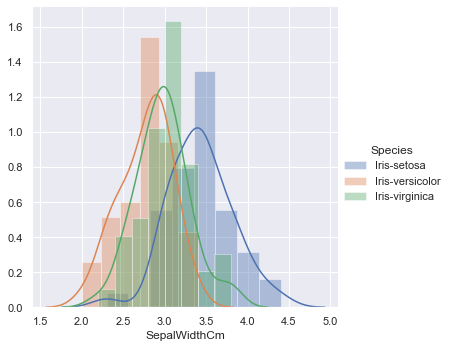

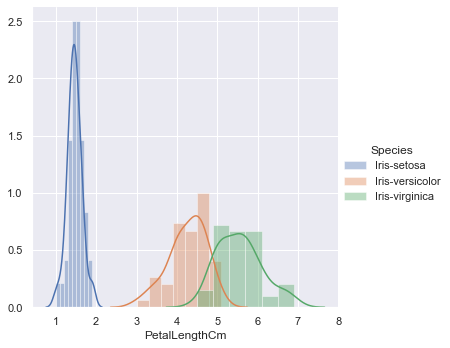

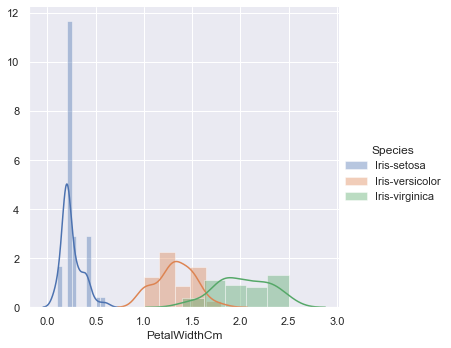

In [104]:
sns.FacetGrid(iris_data, hue="Species", height=5).map(sns.distplot, "SepalLengthCm").add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5).map(sns.distplot, "SepalWidthCm").add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5).map(sns.distplot, "PetalLengthCm").add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5).map(sns.distplot, "PetalWidthCm").add_legend()

plt.show()

Inference:
1. Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature
2. Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature
3. Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two
4. Just like Plot 3, Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two

Inference From 3rd FacetGrid Plot
1. The pdf curve of Iris Setosa ends roughly at 2.1
2. If petal length < 2.1, then species is Iris Setosa
3. The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
4. If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
5. If petal length > 4.8 then species is Iris Virginica